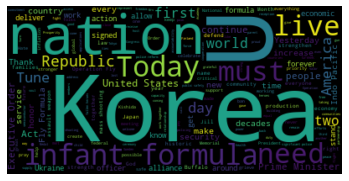

Negative average : 7.23
Positive average : 14.46
Neutral average : 78.31
Compound average : 29.35


In [10]:
import os
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import requests
import json

#Input: 
username = "POTUS"

#Dependencies
BEARER = "AAAAAAAAAAAAAAAAAAAAAJEddAEAAAAAEzFi3yt567TOL1uM%2BeM7mFPgZwg%3Dl23TFu1cLN3DabEJlgulduCSEil2f0ax7FLM1N147TH21Xk4kO"

#returns url with corrected search term for twitter username variable
def get_url():
    usernames = f"usernames={username}"
    user_fields = "user.fields=id"
    url = "https://api.twitter.com/2/users/by?{}&{}".format(usernames, user_fields)
    return url

# returns a object containing an ID associated with api call 
def getUserId():
    url = get_url()
    response = requests.request("GET", url, auth=bearer_oauth,)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    result = response.json()
    return result["data"][0]["id"]

# returns an array of tweets from user
# input: object from API call
# Max: 100 due to API account Permissions
def getData(data):
    text = []
    for i in data["data"]:
        text.append(i["text"])
    return text

# authentication process   
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """
    r.headers["Authorization"] = f"Bearer {BEARER}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

# creates api call based on ID(username) provided
# returns a json
def getAllTweets(id):
    url = "https://api.twitter.com/2/users/{}/tweets".format(id)
    param = {"max_results":100}
    response = requests.get(url, auth=bearer_oauth,params=param)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    result = response.json()
    return result    

def showData(text):
    an = SentimentIntensityAnalyzer()
    neg, pos, neu, compound = 0,0,0,0
    for line in text:
        res = an.polarity_scores(line)
        neg += res["neg"]
        pos += res["pos"]
        neu += res["neu"]
        compound += res["compound"]
    avg_neg = round( neg/len(text) * 100, 2)
    avg_pos = round( pos/len(text) * 100, 2)
    avg_neu = round( neu/len(text) * 100, 2)
    avg_comp = round( compound/len(text) * 100, 2)

    print("Negative average : " + str( avg_neg ) )
    print("Positive average : " + str( avg_pos ) )
    print("Neutral average : " + str( avg_neu ) )
    print("Compound average : " + str( avg_comp ) )
    
def showWordCloud(text):
    stop_words  = set(stopwords.words("english"))
    stop_words.update(["br", "href", "https", "RT", "CO", "//", "@"])
    comments = " ".join( comments for comments in text)
    cloud = WordCloud(stopwords=stop_words).generate(comments)

    plt.imshow(cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()


def main():
    userId = getUserId()
    data = getAllTweets(userId)
    text = getData(data) 
    
    showWordCloud(text)
    showData(text)
    

if __name__ == "__main__":
    main()


